In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [96]:
file = pd.read_csv('TEST TASK (dataset).csv', encoding='UTF-8')
file = file.dropna()
file['target_sub_ltv_day30'].min()

-2.829603837323869

In [108]:
file.tail()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30,total_sessions_diff
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,...,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356,0.0
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,...,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008,1.0
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,...,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221,2.0
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,...,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774,0.0
1467831,6.0,7.0,7.0,7.0,15,15,15,15,15,16,...,COUNTRY_141,0.114909,0.114909,0.114909,android,0.000000,3.949385,0.114909,4.064295,0.0


In [9]:
file.columns

Index(['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7', 'chapters_finished_day0',
       'chapters_finished_day1', 'chapters_finished_day3',
       'chapters_finished_day7', 'chapters_opened_day0',
       'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3',
       'chapters_closed_day7', 'diamonds_received_day0',
       'diamonds_received_day1', 'diamonds_received_day3',
       'diamonds_received_day7', 'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_opened_session9'

In [10]:
file.shape

(1467832, 63)

In [139]:
# створення нових метрик, які містять різницю значень відповідних метрик за два визначені дні
file['total_sessions_day_diff'] = file.total_sessions_day7 - file.total_sessions_day3
file['chapters_opened_day_diff'] = file.chapters_opened_day7 - file.chapters_opened_day3
file['chapters_finished_day_diff'] = file.chapters_finished_day7 - file.chapters_finished_day3
file['diamonds_spent_day_diff'] = file.diamonds_spent_day7 - file.diamonds_spent_day3
file['tickets_spent_day_diff'] = file.tickets_spent_day7 - file.tickets_spent_day3
file['app_sub_ltv_day_diff'] = file.app_sub_ltv_day3 - file.app_sub_ltv_day1
file['app_iap_ltv_day_diff'] = file.app_iap_ltv_day3 - file.app_iap_ltv_day1
file['ad_ltv_day_diff'] = file.ad_ltv_day3 - file.ad_ltv_day1
file['chapters_opened_session_diff'] = file.chapters_opened_session9 - file.chapters_opened_session3
file['chapters_finished_session_diff'] = file.chapters_finished_session9 - file.chapters_finished_session3
file['diamonds_spent_session_diff'] = file.diamonds_spent_session9 - file.diamonds_spent_session3
file['tickets_spent_session_diff'] = file.tickets_spent_session9 - file.tickets_spent_session3
file['diamonds_received_diff'] = file.diamonds_received_day7 - file.diamonds_received_day3

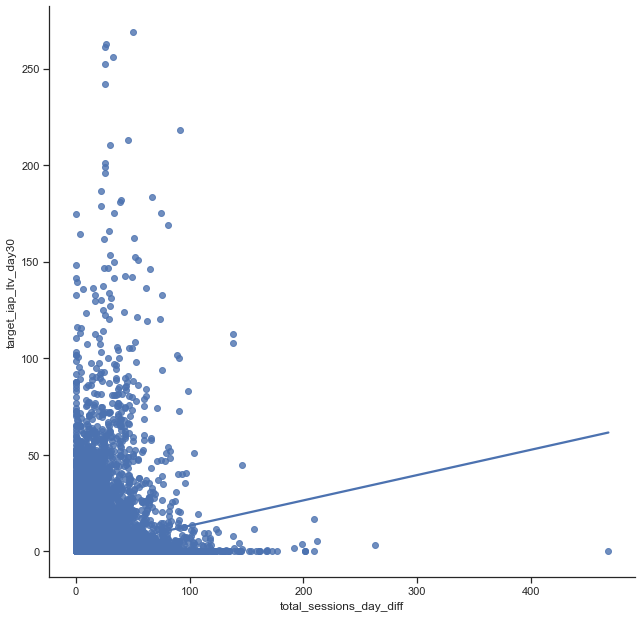

In [112]:
# графік залежності двох метрик: total_sessions_day_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="total_sessions_day_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

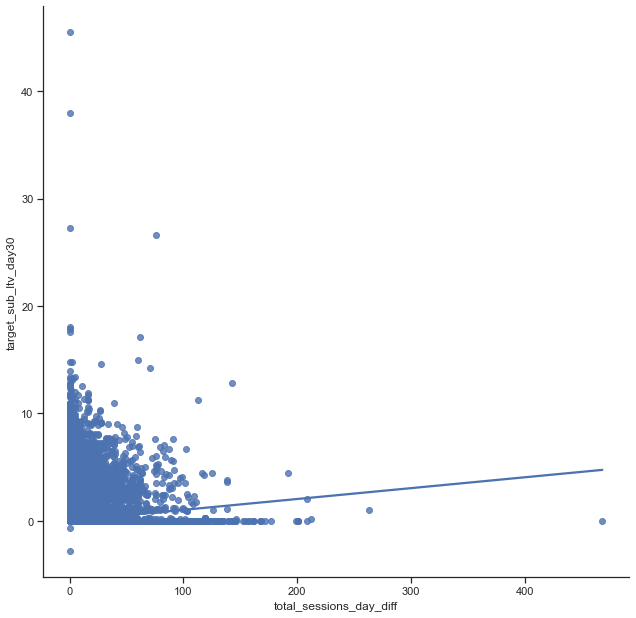

In [113]:
# графік залежності двох метрик: total_sessions_day_diff та target_sub_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="total_sessions_day_diff", y="target_sub_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

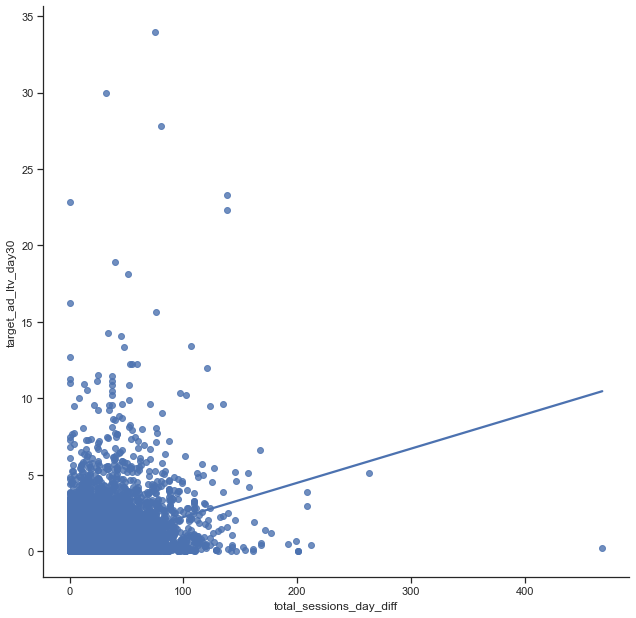

In [114]:
# графік залежності двох метрик: total_sessions_day_diff та target_ad_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="total_sessions_day_diff", y="target_ad_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

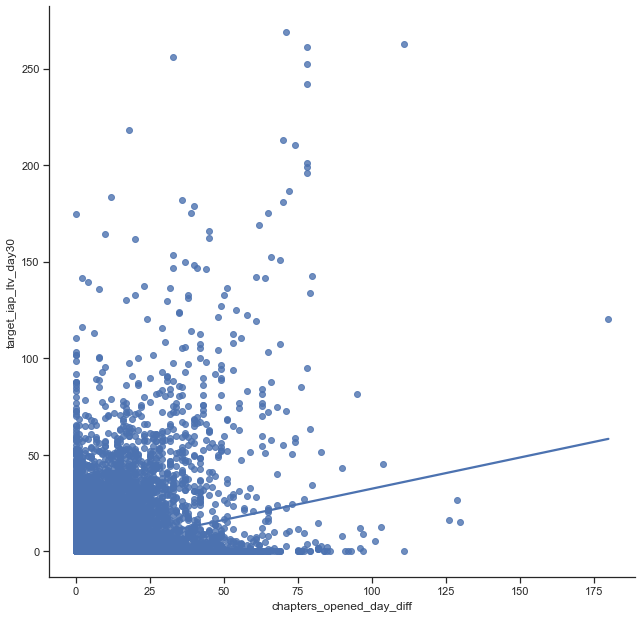

In [120]:
# графік залежності двох метрик: chapters_opened_day_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_opened_day_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

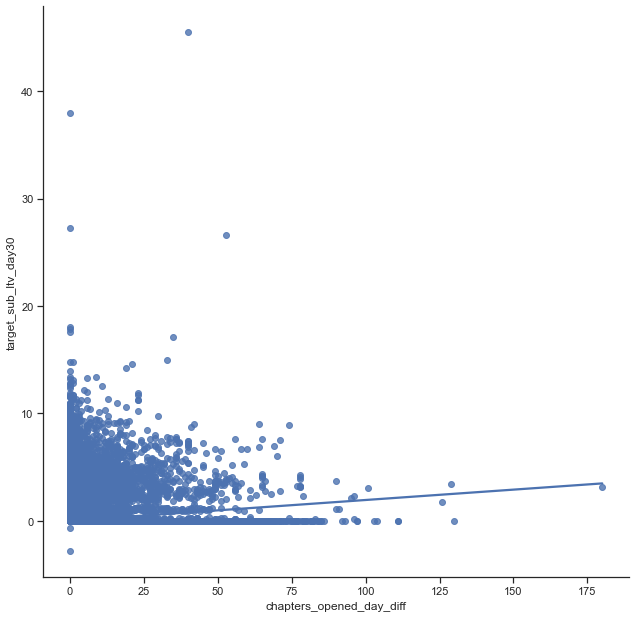

In [121]:
# графік залежності двох метрик: chapters_opened_day_diff та target_sub_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_opened_day_diff", y="target_sub_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

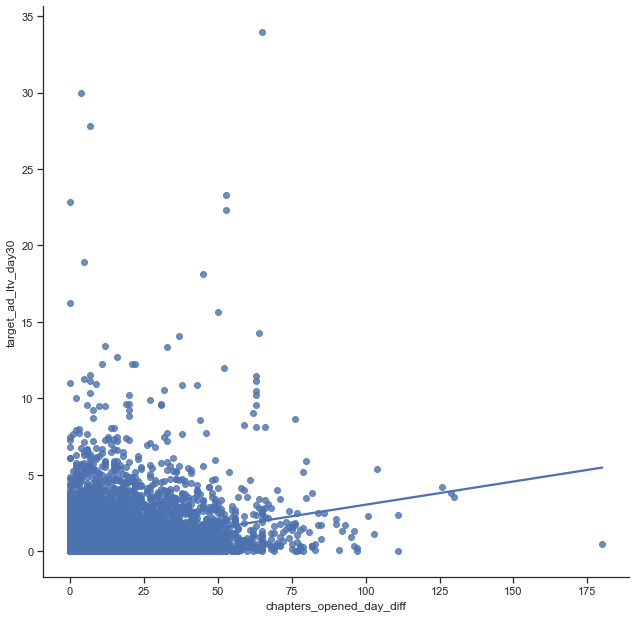

In [122]:
# графік залежності двох метрик: chapters_opened_day_diff та target_ad_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_opened_day_diff", y="target_ad_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

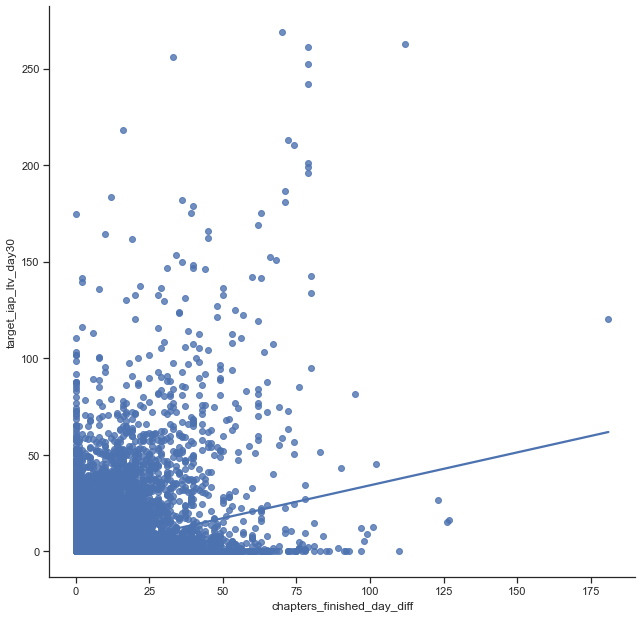

In [123]:
# графік залежності двох метрик: chapters_finished_day_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_finished_day_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

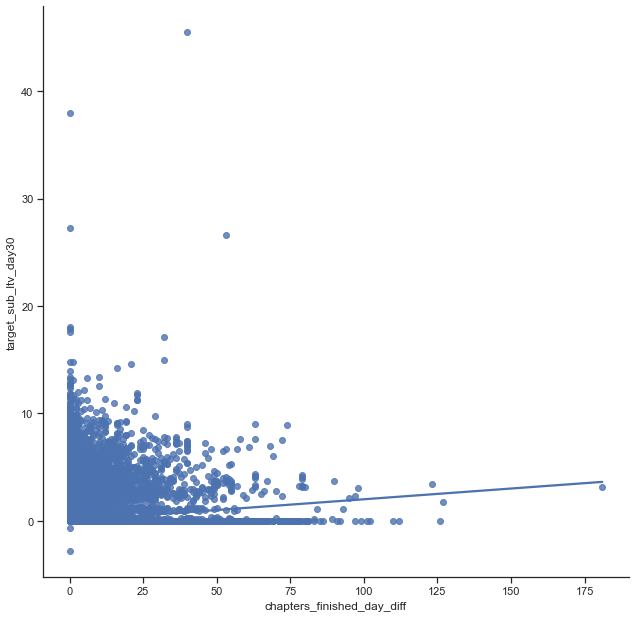

In [126]:
# графік залежності двох метрик: chapters_finished_day_diff та target_sub_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_finished_day_diff", y="target_sub_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

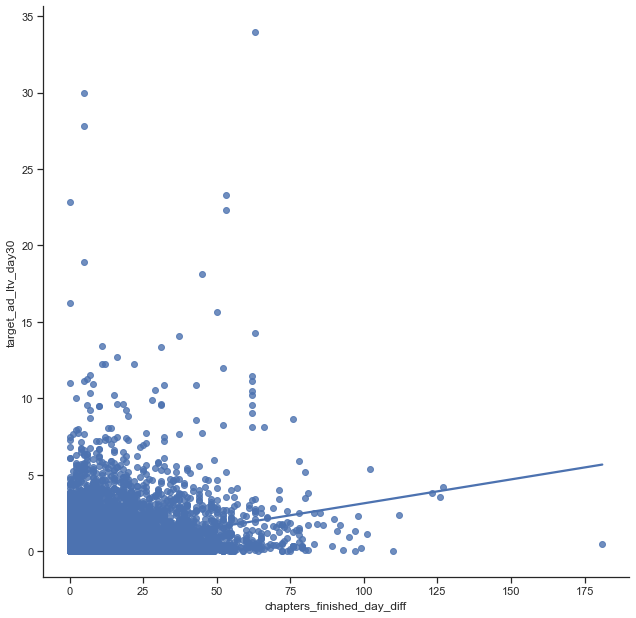

In [125]:
# графік залежності двох метрик: chapters_finished_day_diff та target_ad_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_finished_day_diff", y="target_ad_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

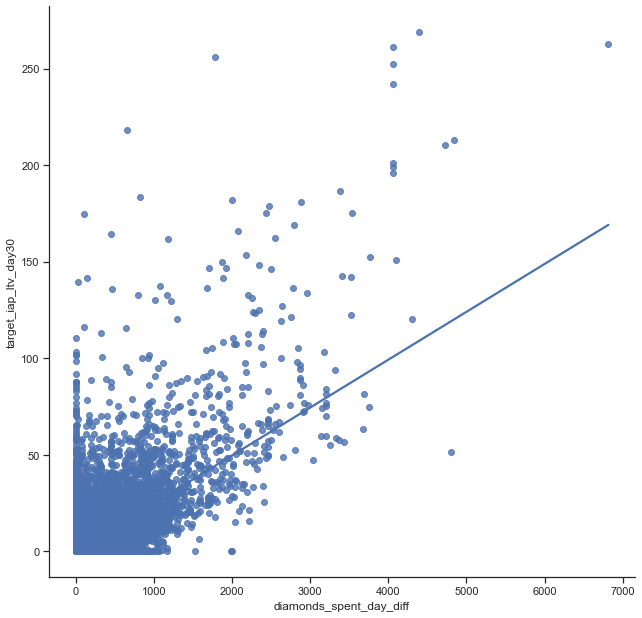

In [115]:
# графік залежності двох метрик: diamonds_spent_day_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="diamonds_spent_day_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

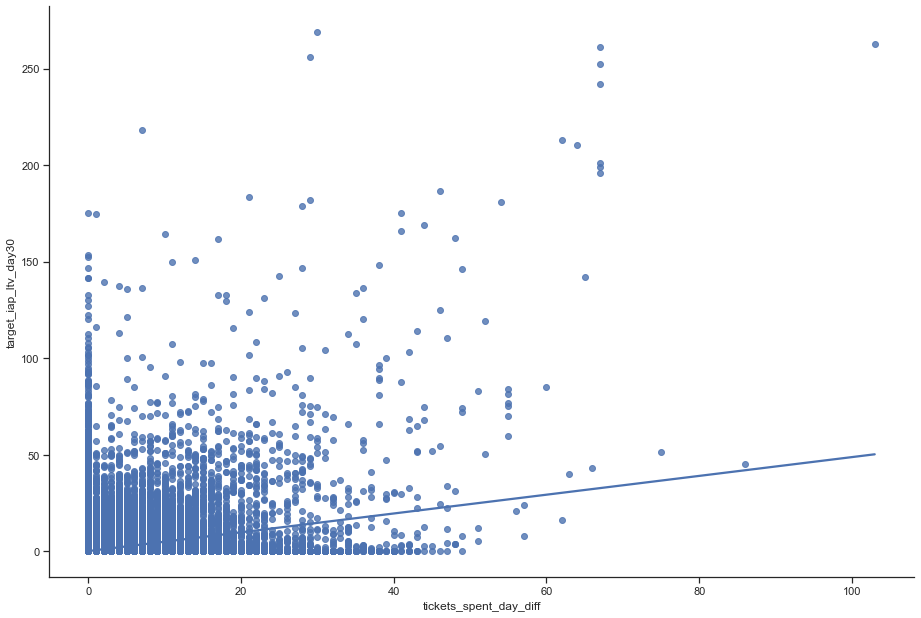

In [116]:
# графік залежності двох метрик: tickets_spent_day_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 10.5)
sns.regplot(x="tickets_spent_day_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

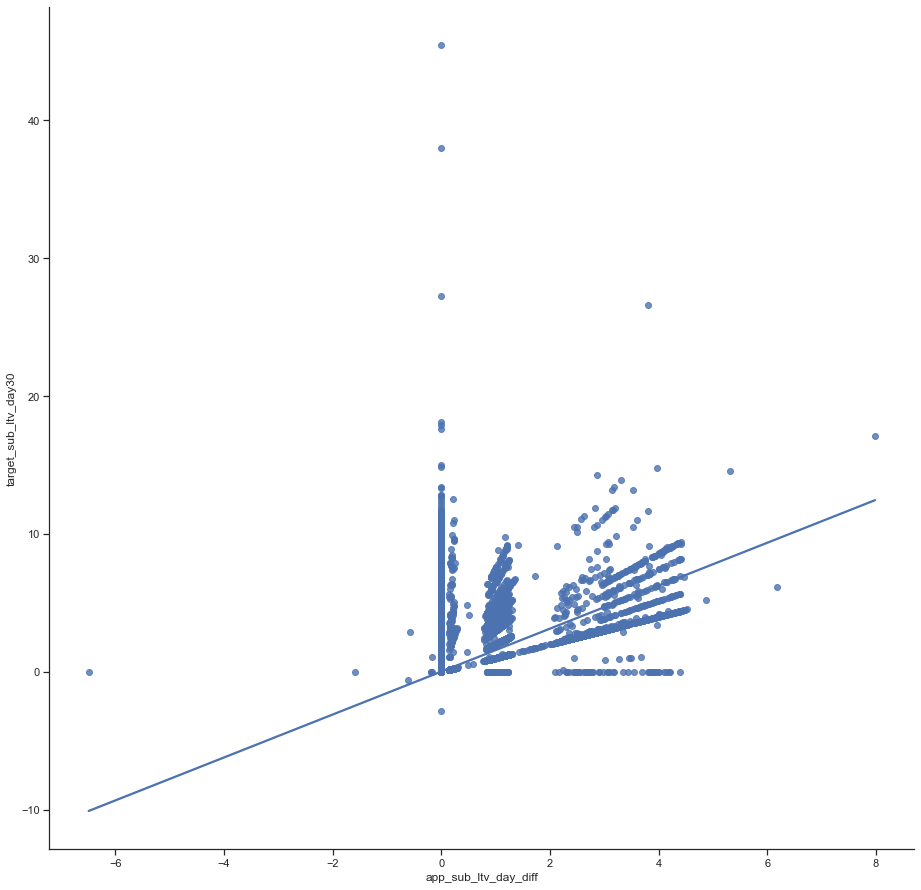

In [117]:
# графік залежності двох метрик: app_sub_ltv_day_diff та target_sub_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 15.5)
sns.regplot(x="app_sub_ltv_day_diff", y="target_sub_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

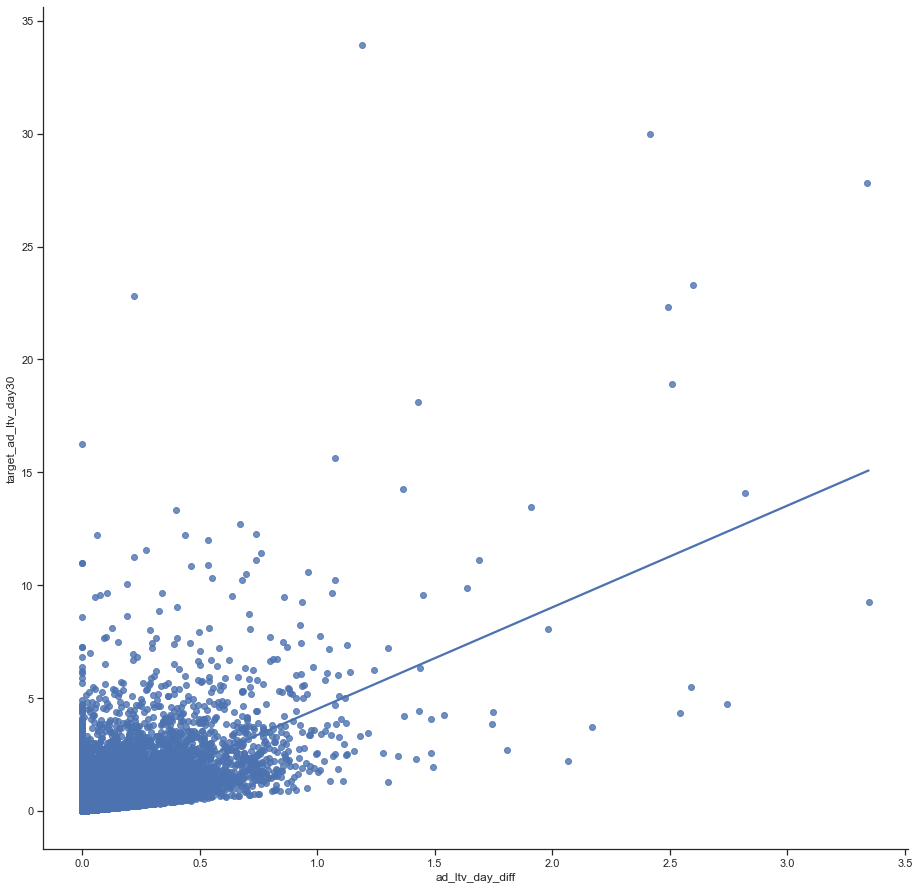

In [118]:
# графік залежності двох метрик: ad_ltv_day_diff та target_ad_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 15.5)
sns.regplot(x="ad_ltv_day_diff", y="target_ad_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

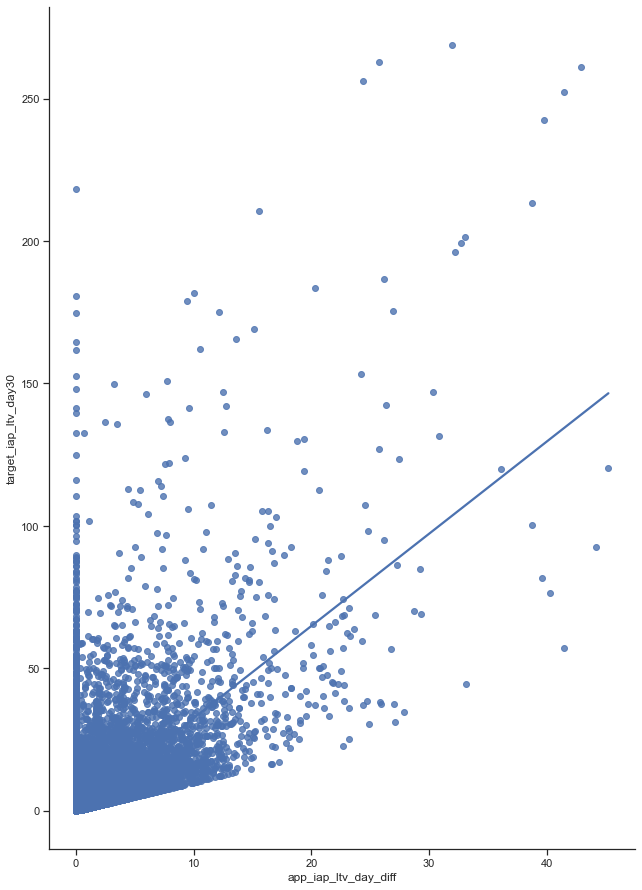

In [119]:
# графік залежності двох метрик: app_iap_ltv_day_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 15.5)
sns.regplot(x="app_iap_ltv_day_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

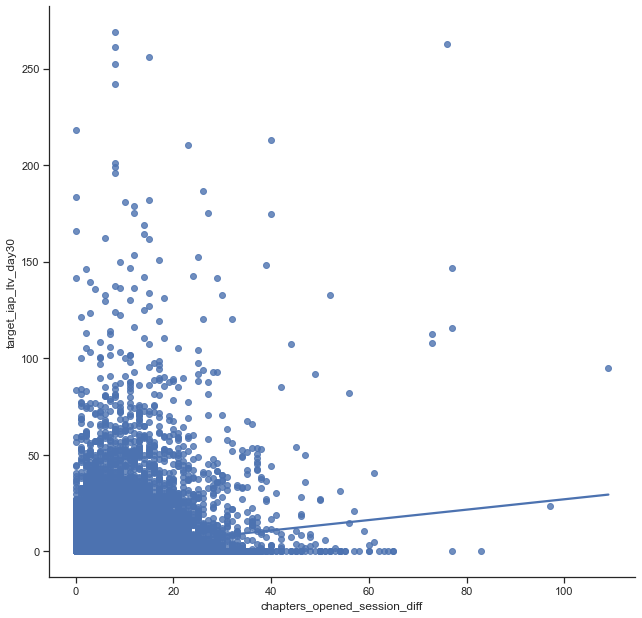

In [127]:
# графік залежності двох метрик: chapters_opened_session_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_opened_session_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

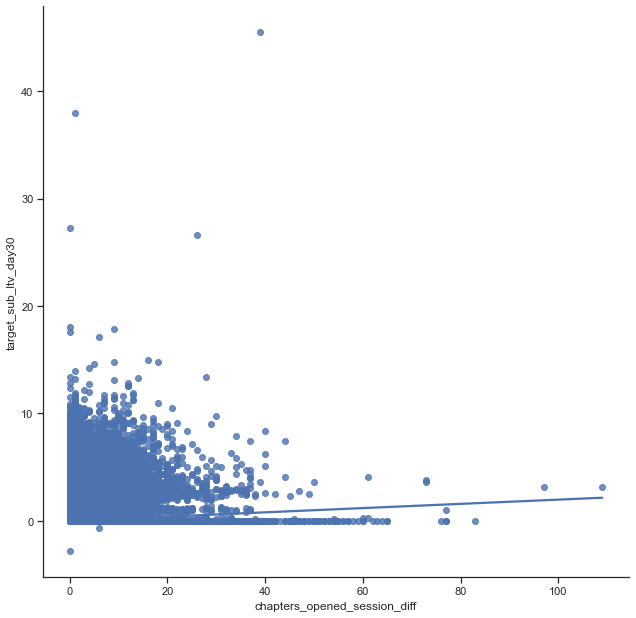

In [128]:
# графік залежності двох метрик: chapters_opened_session_diff та target_sub_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_opened_session_diff", y="target_sub_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

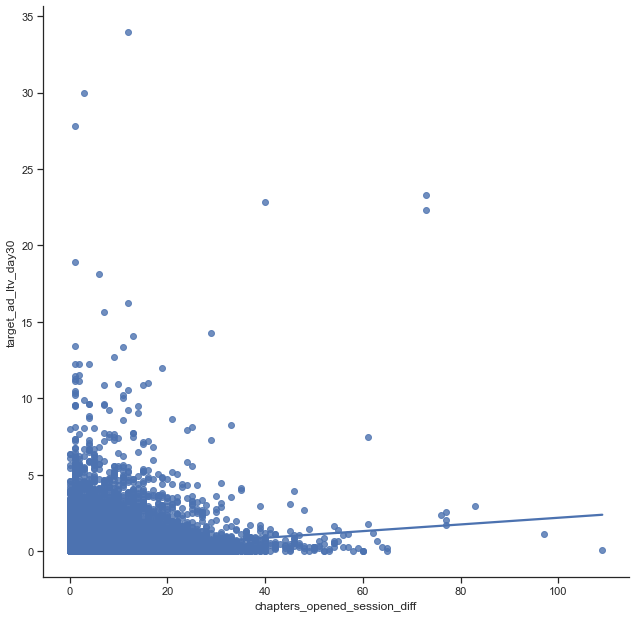

In [129]:
# графік залежності двох метрик: chapters_opened_session_diff та target_ad_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_opened_session_diff", y="target_ad_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

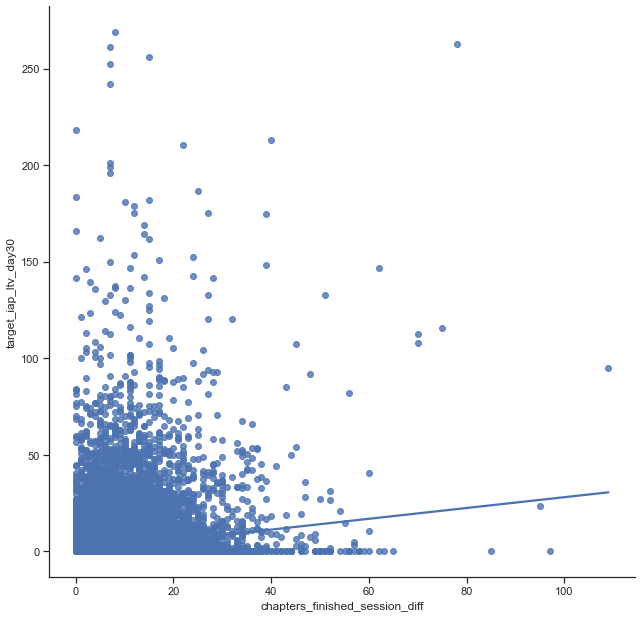

In [130]:
# графік залежності двох метрик: chapters_finished_session_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_finished_session_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

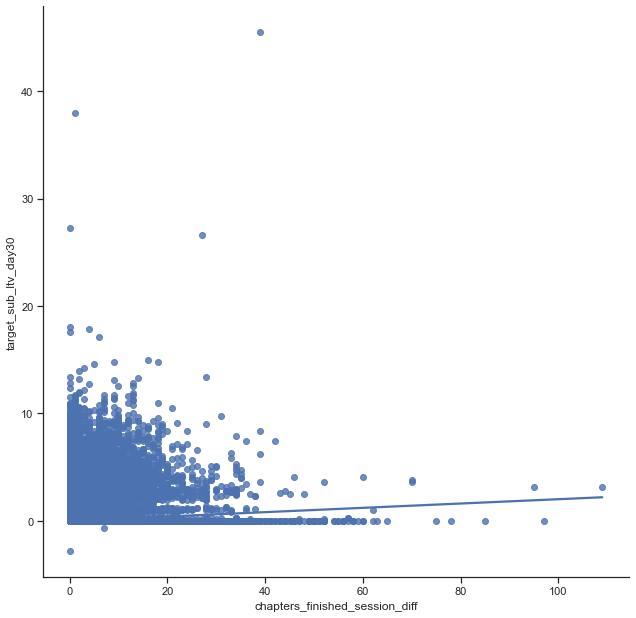

In [131]:
# графік залежності двох метрик: chapters_finished_session_diff та target_sub_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_finished_session_diff", y="target_sub_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

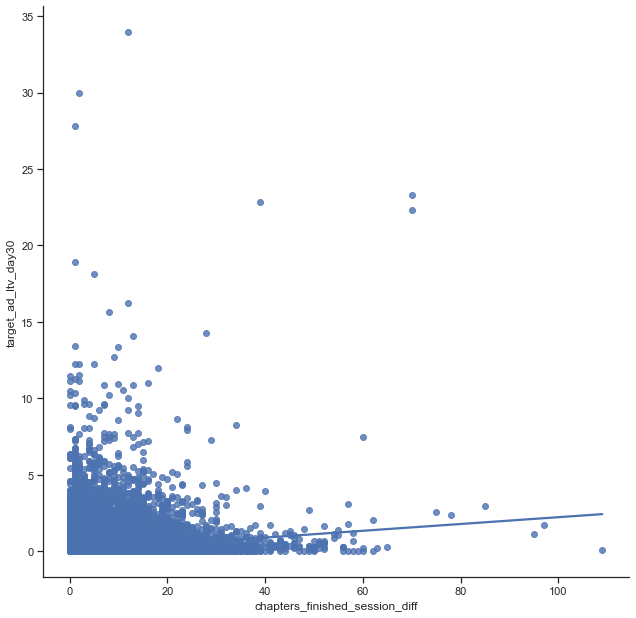

In [132]:
# графік залежності двох метрик: chapters_finished_session_diff та target_ad_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="chapters_finished_session_diff", y="target_ad_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

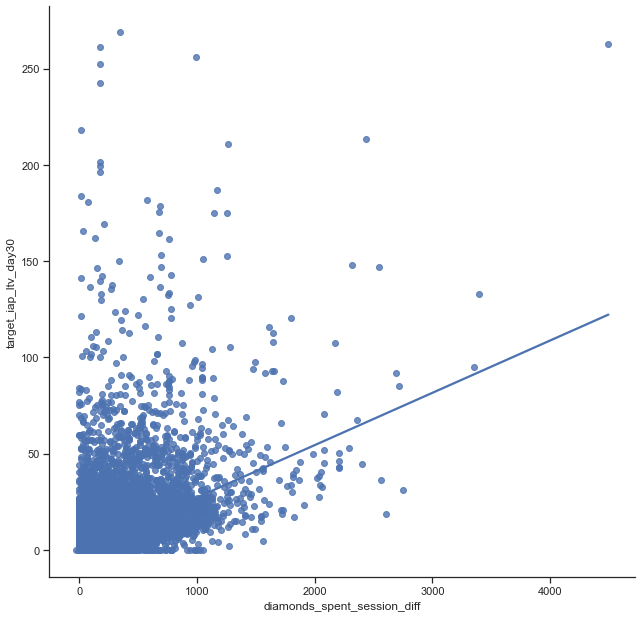

In [133]:
# графік залежності двох метрик: diamonds_spent_session_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="diamonds_spent_session_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

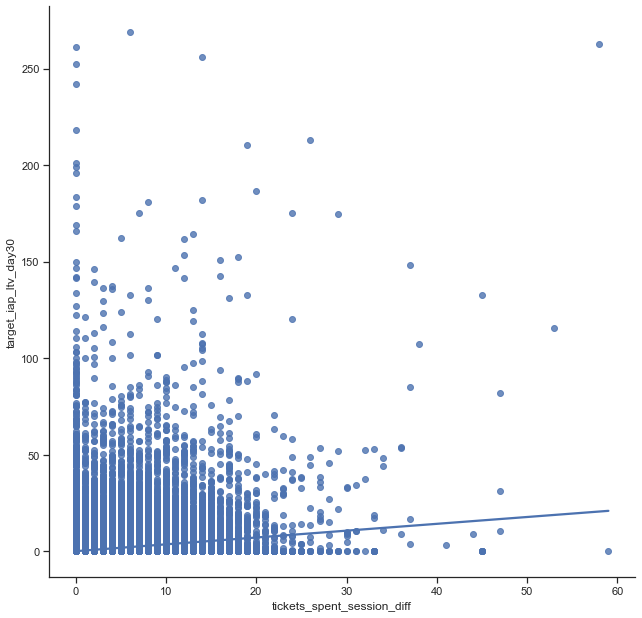

In [136]:
# графік залежності двох метрик: tickets_spent_session_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="tickets_spent_session_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()

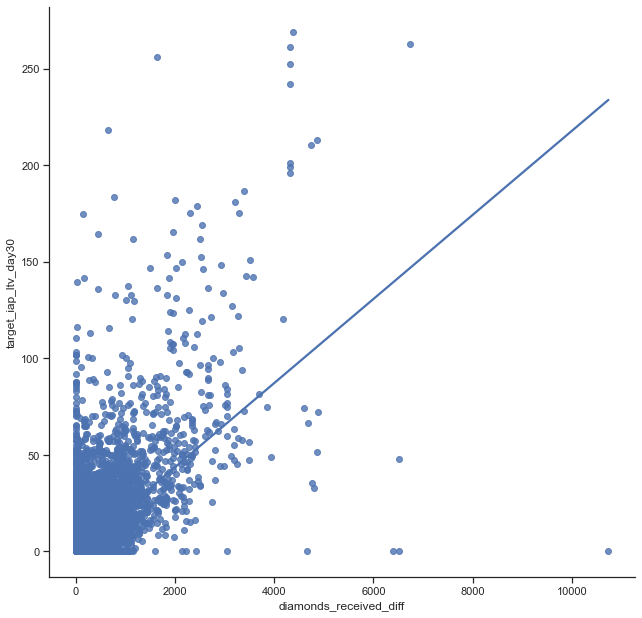

In [140]:
# графік залежності двох метрик: diamonds_received_diff та target_iap_ltv_day30
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5)
sns.regplot(x="diamonds_received_diff", y="target_iap_ltv_day30", ci=None, fit_reg=True, data=file, ax=ax)
sns.despine()